# ПРИБЛИЖЕНИЕ ФУНКЦИЙ

## Самоделкина Мария, БПМ 174

Вариант 19 (5.1.19, 5.3.8, 5.5.10, 5.8.1)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Задача 5.1.19** 

Функция $y=f(x)$ задана таблицей значений $y_0, y_1, .. y_n$ в точках $x_0, x_1, .. x_n$. Используя метод наименьших квадратов (МНК), найти многочлен $P_m(x) = a_0 + a_1 x + .. + a_m x^m$ наилучшего среднеквадратичного приближения оптимальной степени $m=m^*$. За оптимальное значение $m^*$ принять ту степень многочлена, начиная с которой величина $\sigma_m = \sqrt{\frac{1}{n-m}\sum_{k=0}^{n}{(P_m(x_k)-y_k)^2}}$ стабилизируется или начинает возрастать.

Зададим векторы $X$ и $Y$ исходных данных.

In [0]:
X = np.array([6 + i * 0.4 for i in range(11)])
Y = np.array([7.079, -1.509, -7.654, -12.211, -13.941, -15.117, -13.720, -10.702, -4.696, 3.501, 10.572])
X, Y

(array([ 6. ,  6.4,  6.8,  7.2,  7.6,  8. ,  8.4,  8.8,  9.2,  9.6, 10. ]),
 array([  7.079,  -1.509,  -7.654, -12.211, -13.941, -15.117, -13.72 ,
        -10.702,  -4.696,   3.501,  10.572]))

Функция *lsm* cоставляет в явном виде нормальную систему метода наименьших квадратов и решает ее. В случае приближения алгебраическими многочленами $\phi_k(x) = x^k$ нормальаня система принимает следующий вид: $\sum_{j=0}^{m}{(\sum_{i=0}^{n}{x_i^{j+k}})a_j} = \sum_{i=0}^{n}{y_i x_i^k}, k = 0, 1, .. m$, где $m$ - степень многочлена, $n$ - количество заданных точек.

Функция *P* - вычисляет значение многочлена в данной точке с данным набором коэффициентов.

Функция *sigma* вычисляет среднеквадратичное отклонение.

In [0]:
def lsm(X, Y, m):
    P = np.array([[sum(pow(X, k)) for k in range(j, j + m + 1)] for j in range(m + 1)])
    b = np.array([Y @ pow(X, k) for k in range(m + 1)])
    if not m:
        a = b / P
    else:
        a = np.linalg.solve(P, b)
    return a


def P(a, x):
    y = a @ np.array([pow(x, k) for k in range(len(a))])
    return y

    
def sigma(X, Y, a):
    s = sum([(P(a, X[k]) - Y[k]) ** 2 for k in range(len(X))]) / (len(X) - len(a))
    return np.sqrt(s)

Проверим работу функции на примере из учебника.

In [0]:
lsm(np.array([i * 0.1 for i in range(10)]), np.array([0.21, 0.23, 0.31, 0.29, 0.42, 0.35, 0.58, 0.61, 0.59, 0.66]), 1)

array([0.18309091, 0.53757576])

In [0]:
lsm(np.array([i * 0.1 for i in range(10)]), np.array([0.21, 0.23, 0.31, 0.29, 0.42, 0.35, 0.58, 0.61, 0.59, 0.66]), 2)

array([0.19445455, 0.45234848, 0.09469697])

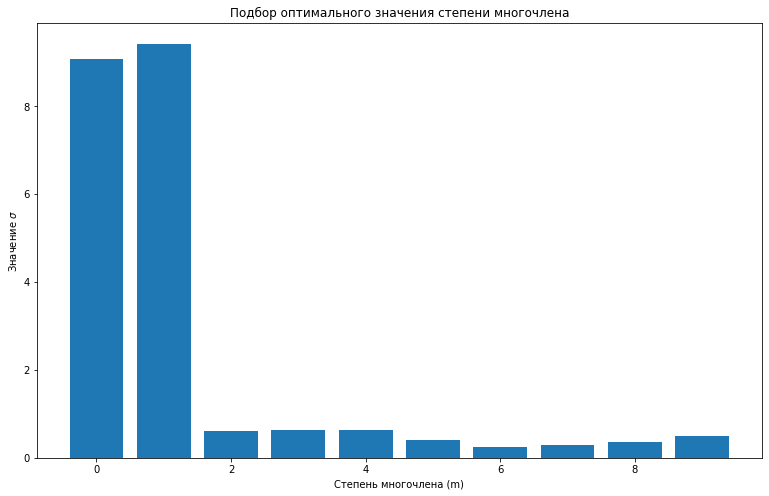

In [0]:
S = []
for m in range(10):
    a = lsm(X, Y, m)
    S.append(sigma(X, Y, a))

plt.figure(figsize=(13, 8))
plt.bar(range(10), S)
plt.title('Подбор оптимального значения степени многочлена')
plt.ylabel('Значение $\sigma$')
plt.xlabel('Степень многочлена (m)')
plt.show()

Оптимальная степень $m^*$ многочлена наилучшего среднеквадратичного приближения - 6.

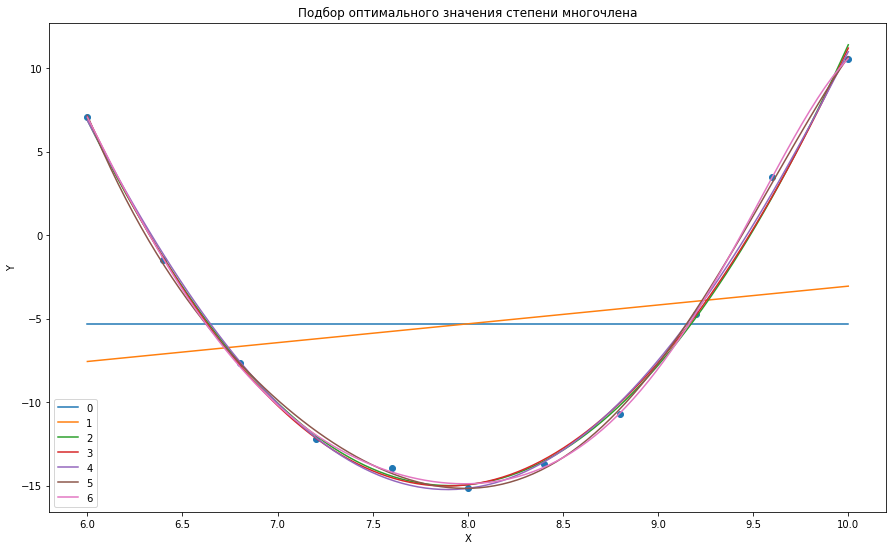

In [0]:
plt.figure(figsize=(15, 9))
sp = np.linspace(6, 10, 100)
for m in range(7):
    a = lsm(X, Y, m)
    plt.plot(sp, [P(a, s) for s in sp], label=f'{m}')
plt.scatter(X, Y)
plt.title('Подбор оптимального значения степени многочлена')
plt.ylabel('Y')
plt.xlabel('X')
plt.legend()
plt.show()

**Задача 5.3.8** 

Зависимость между величинами $x$ и $y$ описывается функцией $y=f(x, a, b)$, где $a$ и $b$ – неизвестные параметры. Найти эти параметры, сведя исходную задачу к линейной задаче метода наименьших квадратов.

$f(x, a, b) = \sqrt{a+b x} + 2$

Сведем исходную задачу к МНК. Вычтем из обеих частей 2 и возведем обе части в квадрат. Введем новую переменную $s = (y - 2)^2.$ Тогда получим задачу об определении коэффициентов линейной зависимости: $s = a + b x$.

In [0]:
X = np.array([1 + i * 0.7 for i in range(11)])
Y = np.array([4.0199, 3.9404, 3.8574, 3.7706, 3.6793, 3.5827, 3.4799, 3.3693, 3.249, 3.1158, 2.9644])
X, Y

(array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 array([4.0199, 3.9404, 3.8574, 3.7706, 3.6793, 3.5827, 3.4799, 3.3693,
        3.249 , 3.1158, 2.9644]))

Расчитываем значение новой переменной. Находим коэффициенты $a$ и $b$ методом наименьших квадратов.

In [0]:
S = pow(Y - 2, 2)
a, b = lsm(X, S, 1)
a, b

(4.530026100324674, -0.4500005562337659)

Среднеквадратичного отклонения практически нет.

In [0]:
sigma(X, S, [a, b])

6.965741244246145e-05

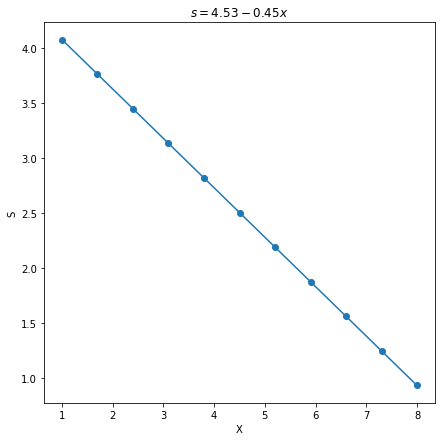

In [0]:
plt.figure(figsize=(7, 7))
sp = np.linspace(1, 8, 100)
plt.plot(sp, a + b * sp)
plt.scatter(X, S)
plt.title('$s = 4.53 - 0.45 x$')
plt.ylabel('S')
plt.xlabel('X')
plt.show()

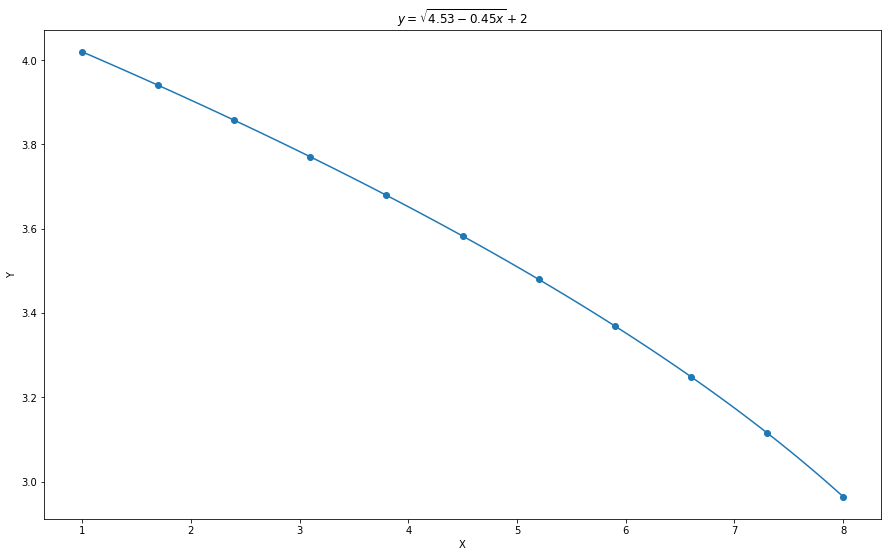

In [0]:
plt.figure(figsize=(15, 9))
sp = np.linspace(1, 8, 100)
plt.plot(sp, np.sqrt(a + b * sp) + 2)
plt.scatter(X, Y)
plt.title('$y = \sqrt{4.53 - 0.45 x} + 2$')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

**Задача 5.6.10 вместо 5.5.10**

Дана функция $y=f(x)$. Приблизить $f(x)$ на отрезке $[a,b]$ интерполяционными многочленами Лагранжа 1, 2, 3 степеней. На одном чертеже построить графики приближающих многочленов и функции $f(x)$. Для многочлена 3 степени сравнить качество приближения при различном выборе узлов интерполяции.

$f(x) = arcsin(x)$

$[a, b] = [-1, 1]$

Многочлен Лагранжа:

$L_n(x) = \sum_{j=0}^{n}{y_j l_{nj}(x)}, $ где $l_{nj}(x)  = \prod_{k=0, k \ne j}^{n}\frac{x - x_k}{x_j - x_k}.$

Многочлен первой степени (линейный) строится по 2-м точкам, многочлен второй степени (квадратичный) строится по 3-м точкам, многочлен третей степени (кубический) строится по 4-м точкам.

Для сравнения качества приближения будем оценивать погрешность интероляции: $\epsilon_m = max_{[a,b]}|L_m(x)-f(x)|.$  

Также будем использовтать узлы интерполяции, имеющие чебышевское распределение: 
$ x_k = \cos\left(\frac{2k-1}{2n}\pi\right) , \quad k = 1, \ldots, n.$



In [0]:
f = lambda x: np.arcsin(x)

In [0]:
def lagrange(X, x, k):
    lagr = [(x - X[i]) / (X[k] - X[i]) for i in range(len(X)) if i != k]
    lagr = np.prod(lagr)
    return lagr


def Lagrange(X, Y, x):
    lagr = Y @ [lagrange(X, x, i) for i in range(len(X))]
    return lagr


def chebyshev(n):    
    x = np.array([np.cos((2 * k - 1) * np.pi / (2 * n)) for k in range(1, n + 1)])
    return x    


def epsilon(Y, YY):
    return np.max(Y - YY)

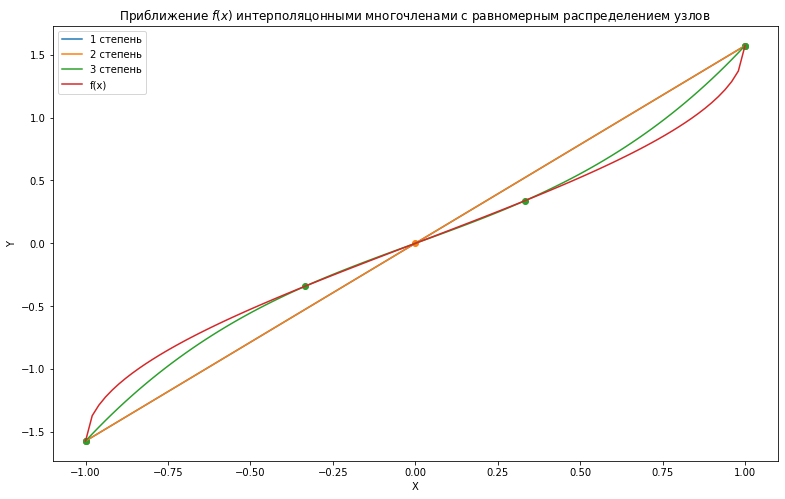

In [0]:
sX = np.linspace(-1, 1, 100)
sY = f(sX)
plt.figure(figsize=(13, 8))
for i in range(3):
    X = np.linspace(-1, 1, i + 2)
    lagrY = [Lagrange(X, f(X), sx) for sx in sX]
    plt.plot(sX, lagrY, label=f'{i+1} степень')
    plt.scatter(X, f(X))
plt.plot(sX, sY, label='f(x)')
plt.legend()
plt.title('Приближение $f(x)$ интерполяцонными многочленами с равномерным распределением узлов')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Многочлен первой степени совпал с многочленом второй степени. Поскольку равномерно распределенные узлы интерполяции для многочлена второй степени находятся на одной прямой.

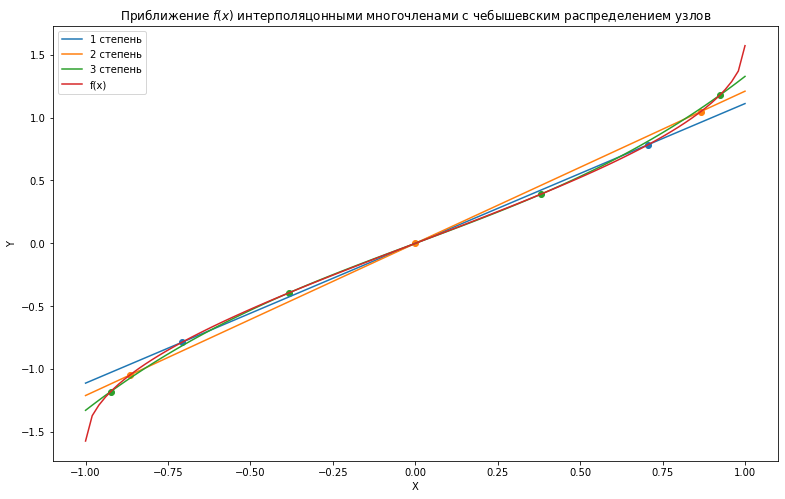

In [0]:
sX = np.linspace(-1, 1, 100)
sY = f(sX)
plt.figure(figsize=(13, 8))
for i in range(3):
    X = chebyshev(i + 2)
    lagrY = [Lagrange(X, f(X), sx) for sx in sX]
    plt.plot(sX, lagrY, label=f'{i+1} степень')
    plt.scatter(X, f(X))
plt.plot(sX, sY, label='f(x)')
plt.legend()
plt.title('Приближение $f(x)$ интерполяцонными многочленами c чебышевским распределением узлов')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

0.18942824003657277 - Ошибка равномерного распределния узлов
0.24406530887569278 - Ошибка чебышевского распределния узлов


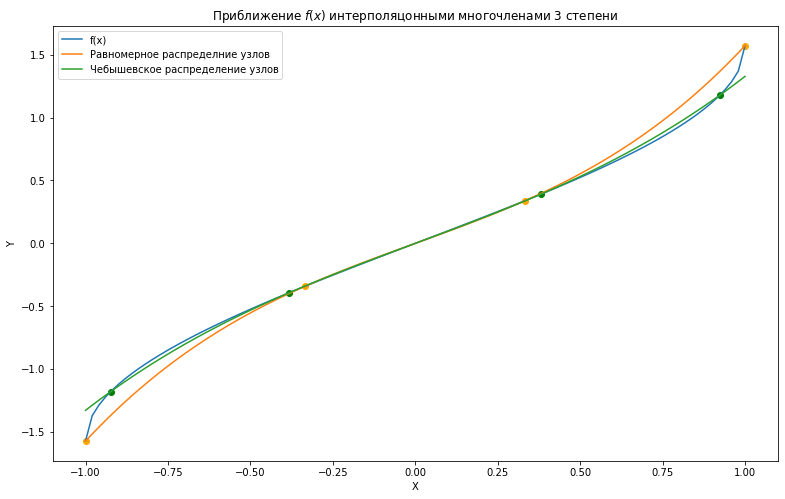

In [0]:
sX = np.linspace(-1, 1, 100)
sY = f(sX)
plt.figure(figsize=(13, 8))
plt.plot(sX, sY, label='f(x)')

X = np.linspace(-1, 1, 4)
lagrY = [Lagrange(X, f(X), sx) for sx in sX]
plt.plot(sX, lagrY, label='Равномерное распределние узлов')
plt.scatter(X, f(X), c='orange')
print(epsilon(lagrY, sY), '- Ошибка равномерного распределния узлов')

X = chebyshev(4)
lagrY = [Lagrange(X, f(X), sx) for sx in sX]
plt.plot(sX, lagrY, label='Чебышевское распределение узлов')
plt.scatter(X, f(X), c='green')
print(epsilon(lagrY, sY), '- Ошибка чебышевского распределния узлов')

plt.legend()
plt.title('Приближение $f(x)$ интерполяцонными многочленами 3 степени')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Для чебышевского распределения узлов погрешность интерполяции больше засчет неточности на коцах отрезка. Но в целом для чебышевского распределения многочлен находится ближе к интерполируемой функции.

**Задача 5.5.2 вместо 5.5.10**

Известно, что $y=c_1 sin(a \pi x)+c_2 cos(b \pi x)$, где коэффициенты $c_1$ и $c_2$ подлежат определению.
Используя метод наименьших квадратов, определить $c_1$ и $c_2$.

Для нахождения коэффициентов $c_1$ и $c_2$ необходимо составить нормальную систему МНК (базисные функции: $sin(a \pi x)$ и $cos(b \pi x)$) и решить ее.

Нормальная система метода наименьших квадратов:

$$ \sum_{j=0}^{m}{(\sum_{i=0}^{n}{\phi_j(x_i) \phi_k(x_i)})a_j} = \sum_{i=0}^{n}{y_i \phi_k(x_i)}, k = 0, 1, .. m ,$$ где $m = 1$, так как нам необходимо найти $c_1$ и $c_2$.

Обозначим $\phi_0 = sin(a \pi x)$ и $\phi_1 = cos(b \pi x)$. Тогда система перепишется в виде:

$$  \sum_{i=0}^{n}{\phi_0(x_i) \phi_0(x_i)} a_0 + \sum_{i=0}^{n}{\phi_1(x_i) \phi_0(x_i)} a_1 = \sum_{i=0}^{n}{y_i \phi_0(x_i)} $$
$$  \sum_{i=0}^{n}{\phi_0(x_i) \phi_1(x_i)} a_0 + \sum_{i=0}^{n}{\phi_1(x_i) \phi_1(x_i)} a_1 = \sum_{i=0}^{n}{y_i \phi_1(x_i)} $$

In [0]:
X = np.array([-1 + i * 0.1 for i in range(21)])
Y = np.array([-1.0044, -0.4724, -0.2432, -0.4119, -0.6785, -0.5996, -0.0449, 0.7788, 1.4016, 1.4446, 1.0099, 0.4743, 0.2475, 0.4091, 0.6512, 0.6007, 0.0361, -0.7662, -1.3814, -1.4429, -1.0072])
a, b = 3, 1
X, Y

(array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 array([-1.0044, -0.4724, -0.2432, -0.4119, -0.6785, -0.5996, -0.0449,
         0.7788,  1.4016,  1.4446,  1.0099,  0.4743,  0.2475,  0.4091,
         0.6512,  0.6007,  0.0361, -0.7662, -1.3814, -1.4429, -1.0072]))

Зададим $\phi_0 = sin(a \pi x)$ и $\phi_1 = cos(b \pi x)$.

In [0]:
phi0 = lambda x: np.sin(a * np.pi * x)
phi1 = lambda x: np.cos(b * np.pi * x)

Зададим левую часть системы.

In [0]:
p00 = sum([pow(phi0(x), 2) for x in X])
p01 = sum([phi0(x) * phi1(x) for x in X])
p11 = sum([pow(phi1(x), 2) for x in X])
P = [[p00, p01], [p01, p11]]
P

[[9.999999999999996, -1.6996616692943937e-15],
 [-1.6996616692943937e-15, 10.999999999999998]]

Зададим правую часть системы.

In [0]:
r0 = Y @ [phi0(x) for x in X]
r1 = Y @ [phi1(x) for x in X]
r = [r0, r1]
r

[-6.003463994322733, 11.093089257064133]

Решим систему и найдем $c_1$ и $c_2$.

In [0]:
c1, c2 = np.linalg.solve(P, r) 
c1, c2

(-0.6003463994322733, 1.008462659733103)

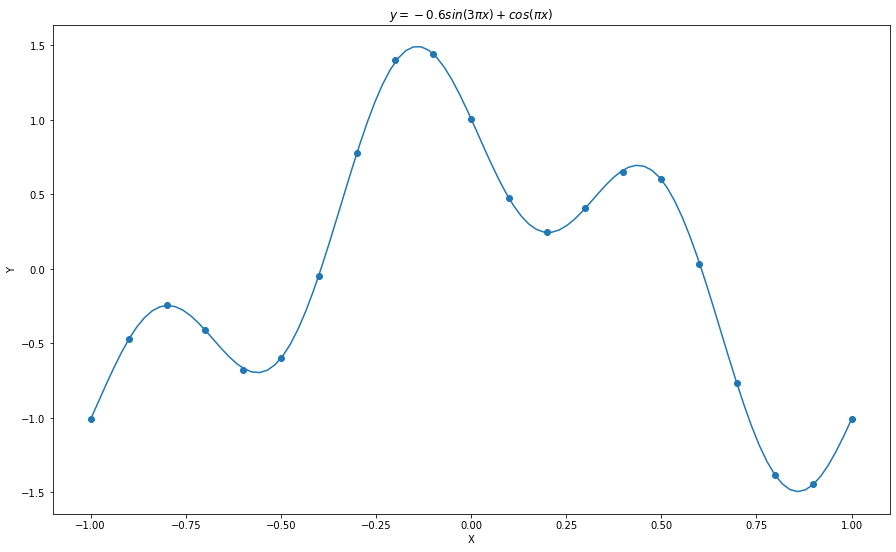

In [0]:
plt.figure(figsize=(15, 9))
sp = np.linspace(-1, 1, 100)
plt.plot(sp, [c1 * phi0(s) + c2 * phi1(s) for s in sp])
plt.scatter(X, Y)
plt.title('$y = -0.6 sin(3 \pi x)+ cos(\pi x)$')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

**Задача 5.8.1**

Дана функция $y=f(x)$. Приблизить $f(x)$ методом глобальной интерполяции при равномерном и чебышевском распределениях узлов интерполяции. Сравнить качество приближения.

$f(x) = cos x^2$, $[a, b] = [-\pi, \pi]$

Зададим функцию для интерполяции $f(x)$ единым для всего отрезка многочленом - интерполяционным многочленом Лагранжа (*функция из задания 5.6*). На вход функции передается любое количество узлов, значения функции в этих узлах и точка для определения значения.

Качество приближения функции $f(x)$ определяется $\epsilon_m = max_{[a,b]}|P_m(x)-f(x)|$.

Узлы интерполяции, имеющие чебышевское распределение вычисляются по следующей формуле для отрезка $[-\pi, \pi]$: 

$$ x_k = \pi \cos\left(\frac{2k-1}{2n}\pi\right) , \quad k = 1, \ldots, n.$$

In [0]:
def chebyshev(n):    
    x = np.array([np.pi * np.cos((2 * k - 1) * np.pi / (2 * n)) for k in range(1, n + 1)])
    return x

In [0]:
f = lambda x: np.cos(pow(x, 2))

Вычислим приближенные значения функции в $3k$ точках по $k$ узлам интерполяции, распределенным равномерно на отрезке, и найдем погрешность.

In [0]:
k = 4
sp = np.linspace(-np.pi, np.pi, 3 * k)
ssp = np.linspace(-np.pi, np.pi, 100)
X = np.linspace(-np.pi, np.pi, k)

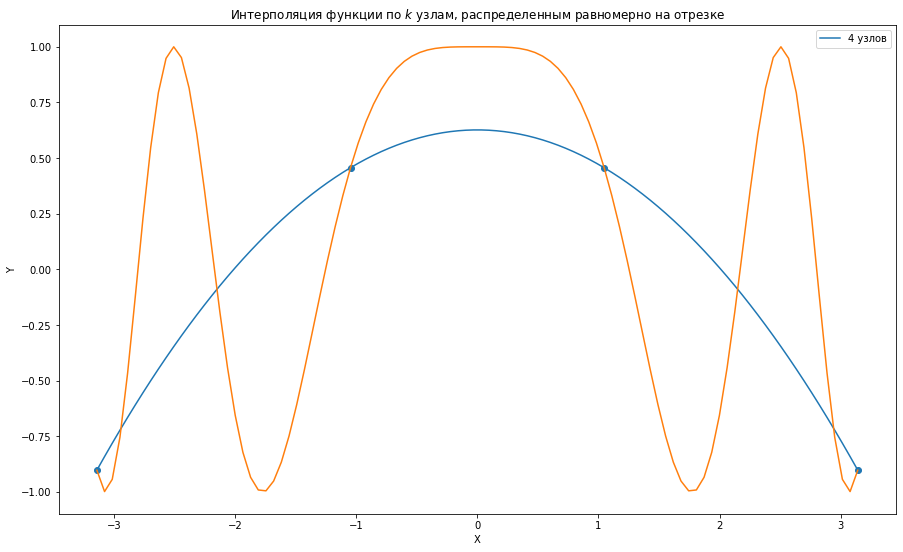

In [0]:
plt.figure(figsize=(15, 9))
spY = [Lagrange(X, f(X), s) for s in ssp]
plt.plot(ssp, spY, label=f'{k} узлов')
plt.scatter(X, f(X))
plt.plot(ssp, f(ssp))
plt.title('Интерполяция функции по $k$ узлам, распределенным равномерно на отрезке')
plt.ylabel('Y')
plt.xlabel('X')
plt.legend()
plt.show()

In [0]:
epsilon([Lagrange(X, f(X), s) for s in sp], f(sp)) # погрешность для 3*k точек

0.7620037937410002

Вычислим приближенные значения функции в $3k$ точках по $k$ узлам интерполяции, имеющим чебышевское распределение.

In [0]:
X = chebyshev(k)

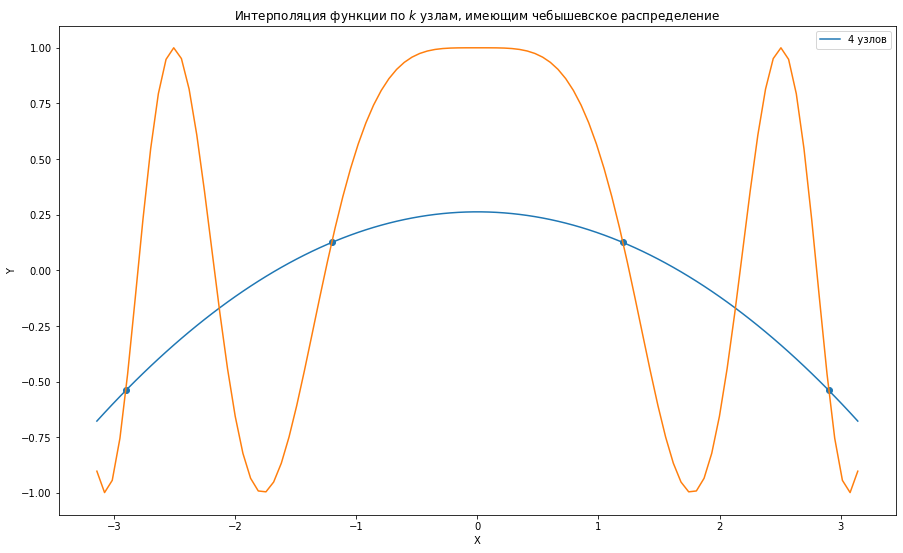

In [0]:
plt.figure(figsize=(15, 9))
spY = [Lagrange(X, f(X), s) for s in ssp]
plt.plot(ssp, spY, label=f'{k} узлов')
plt.scatter(X, f(X))
plt.plot(ssp, f(ssp))
plt.title('Интерполяция функции по $k$ узлам, имеющим чебышевское распределение')
plt.ylabel('Y')
plt.xlabel('X')
plt.legend()
plt.show()

In [0]:
epsilon([Lagrange(X, f(X), s) for s in sp], f(sp))

0.5380761557924597

Видно, что ошибка для интерполяции функции по узлам, имеющим чебышевское распределение, меньше в отличие ошибки при равномерном распределения узлов.

Вычислим приближенные значения функции в $3k$ точках по $2k$ узлам интерполяции, распределенным равномерно на отрезке.

In [0]:
X = np.linspace(-np.pi, np.pi, 2 * k)

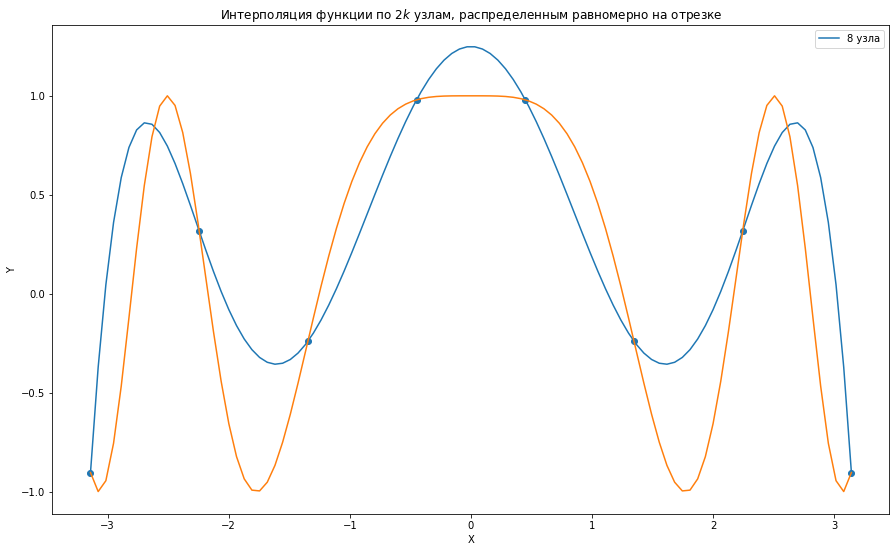

In [0]:
plt.figure(figsize=(15, 9))
spY = [Lagrange(X, f(X), s) for s in ssp]
plt.plot(ssp, spY, label=f'{2 * k} узла')
plt.scatter(X, f(X))
plt.plot(ssp, f(ssp))
plt.title('Интерполяция функции по $2k$ узлам, распределенным равномерно на отрезке')
plt.ylabel('Y')
plt.xlabel('X')
plt.legend()
plt.show()

In [0]:
epsilon([Lagrange(X, f(X), s) for s in sp], f(sp))

0.5760265655550495

Вычислим приближенные значения функции в $3k$ точках по $2k$ узлам интерполяции, имеющим чебышевское распределение.

In [0]:
X = chebyshev(2 * k)

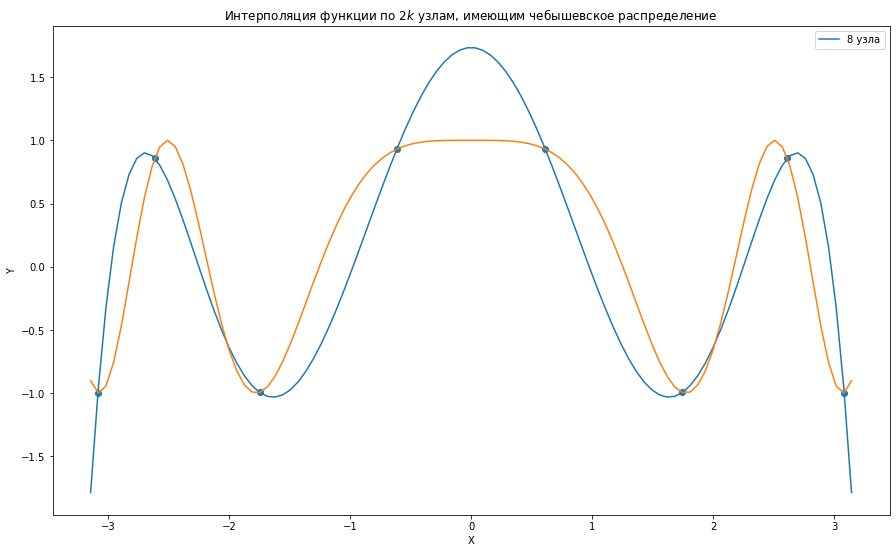

In [0]:
plt.figure(figsize=(15, 9))
spY = [Lagrange(X, f(X), s) for s in ssp]
plt.plot(ssp, spY, label=f'{2 * k} узла')
plt.scatter(X, f(X))
plt.plot(ssp, f(ssp))
plt.title('Интерполяция функции по $2k$ узлам, имеющим чебышевское распределение')
plt.ylabel('Y')
plt.xlabel('X')
plt.legend()
plt.show()

In [0]:
epsilon([Lagrange(X, f(X), s) for s in sp], f(sp))

0.5491388474593356

При увеличении количества узлов для интерполяции в 2 раза для равномерного распределения узлов ошибка уменьшилась, а для чебышевского распределения узлов ошибка немного увеличилась (засчет неточного приближения на концах отрезка). При этом чебышевское распределение узлов при сравнении по-прежнему дает наименьшую ошибку.